In [1]:
import sys;import os;
module_path = os.path.abspath(os.path.join('..')).split('PythonCode')[0]+'PythonCode'
if module_path not in sys.path: sys.path.append(module_path+"/")

# Plib imports for the strategy
import Plib.Brokers.OrderMgr as ordmgr
import Plib.DataFarm.Finnhub as datafarm
import Plib.AlgoTrader.Trader as bt
import Plib.AlgoTrader.Simulator as md
import Plib.Signals.TAnalysis as signalsfarm
import multiprocessing as mp
import time
import warnings
warnings.filterwarnings("ignore")
import math as m
import pandas as pd
import datetime as dt


In [2]:
#########################################################################################################
#STEP 1: Import or define trading logic by event                                                            #                     
#########################################################################################################
def logic(i,x,om,mdata,hdata,trade,checkStops,closeAllTrades,moneyMgmt,algo_params):
    #Market data 
    #IB
    #['Time','BidPrice','AskPrice','BidSize','AskSize','BidPastLow','AskPastHigh',
    #'Midprice','WMidprice']
    #IEX
    #['Date', 'high', 'low', 'average', 'volume','notional', 'numberOfTrades', 'marketHigh', 'marketLow',
    #'marketAverage', 'marketVolume', 'marketNotional','marketNumberOfTrades', 
    #'open', 'close', 'marketOpen', 'marketClose','changeOverTime', 'marketChangeOverTime']
    
    #Simulator
    #Tkr, Open, High, Low,Close,Volume,Bid,Ask,BidV,AskV,TWAP,VWAP,TS 
    print(mdata['TWAP'])
    tkr=mdata['Tkr']
    mprice=mdata['TWAP']
    
    #Close all trades at the end
    if i >= 50:
        if i==50:
            print('Closing trade...')
            closeAllTrades('AAPL',mprice,i)
    elif tkr == 'AAPL':
        #Obtain best quantity to trade
        qty=1
        day=1+mdata['TS'].weekday()
        hour=mdata['TS'].hour
        #if (day in (1,2,3,4,5)) and (hour in (9,10,11,12,13,14,15,16)):  
        #if i%100==0: 
        if hdata.smaFast.iloc[-1]!=0 and hdata.smaSlow.iloc[-1] !=0:
            if hdata.smaFast.iloc[-1] < hdata.smaSlow.iloc[-1]:
                if x.Account.iloc[-1] > qty*mprice:
                    print('Selling: Sell ' + str(mdata['TS']))
                    trade(i,'AAPL',-1,mprice,qty)
                    
            if hdata.smaFast.iloc[-1] > hdata.smaSlow.iloc[-1]:
                if x.Account.iloc[-1] > qty*mprice:
                    print('Buying: Buy ' + str(mdata['TS']))
                    trade(i,'AAPL',1,mprice,qty)
                    

In [3]:
#########################################################################################################
#STEP 2: shape hist data buffer and start market data                                                         #
#########################################################################################################
def indicators(df):
    df=signalsfarm.getSMA(df,lbl_comp='Close',win=20,lbl_out='smaFast')
    df=signalsfarm.getSMA(df,lbl_comp='Close',win=180,lbl_out='smaSlow')
    return df
#hfdata = 1min ;update = 30 min; lfdata = 60 min
#every 30 min the lfdata windows is updated; if update < lfdata updates does not
#involve new data to avoid lookahead bias
param_sim={'proc_type':'ornstein_uhlenbeck','freq1':'H','freq2':'H',
           'pmissdata1':0.15,'pmissdata2':0,'n_tperiods1':50*60,'n_tperiods2':50,
           'max_delay':1.3,'update_freq':30}
#bsize greater then the largest window of the indicators
param_sec={'MSFT':{'price':302.1,'ltmean':300,'updf':indicators,'bsize':200},
           'AAPL':{'price':120.1,'ltmean':180,'updf':indicators,'bsize':200}}
param_server={'ptype':0, 'HOST':'127.0.0.1', 'PORT':2012, 'conn':None}
Mdata = md.Simulator(param_sim,param_sec,param_server)
ServerProcess = mp.Process(target=Mdata.start, args=(50,))
ServerProcess.start()


Created 3000 datapoints with frequency H
Start 2022-06-02 01:44:57.778260+00:00 - End 2022-10-05 00:44:57.778260+00:00
Created 250 datapoints with frequency H
Start 2022-05-24 17:44:57.995174+00:00 - End 2022-06-04 02:44:57.995174+00:00
Started streaming server with PID 2941


In [32]:
#squaring 0

In [4]:
#Parameters
tickers={'AAPL':[0.0015 ,0.001,0.0015 ,0.001],'MSFT':[0.0015 ,0.001,0.0015 ,0.001]}
tickers={'AAPL':[0.0015 ,0.001,0.0015 ,0.001]}
rules={'Squaring':0,'Slippage':0,'Commissions':0,'Bracketing':0,'MoneyMgmt':0}
init_params={'freq':'H', 'tz':'America/New_York', 'db':'','in_mem':True,'str_name':'Trader',
             'str_desc':'','sdate':'2006-12-28','edate':'2009-04-30',
               'brk':1,'exc':1,'cli':100,'cur':'USD','simulator':1}
        
b=bt.Trader(ordmgr=ordmgr,tickers=tickers,rules=rules,
            param_conn=param_server,init_params=init_params)    
b.finalizeData(usd_account=2500)
b.start(logic)


Connected with IB Order Manager with parameters:  100 /Users/rob/Desktop/PythonCode/Plib/Ledger/ledgerBT.db
Selling: Sell 2021-07-12 13:49:25.327004+00:00
No Squaring  0
No Filter  0
Trading  AAPL -1.0 1 True 2021-07-12 13:49:25.327004+00:00 2
Opening Filled/Runn_total  1.0 -1.0
Recorded  AAPL -1 1 True
Selling: Sell 2021-07-12 14:49:25.327004+00:00
No Squaring  0
No Filter  0
Trading  AAPL -1.0 1 True 2021-07-12 14:49:25.327004+00:00 3
Opening Filled/Runn_total  1.0 -2.0
Recorded  AAPL -1 1 True
Selling: Sell 2021-07-12 15:49:25.327004+00:00
No Squaring  0
No Filter  0
Trading  AAPL -1.0 1 True 2021-07-12 15:49:25.327004+00:00 4
Opening Filled/Runn_total  1.0 -3.0
Recorded  AAPL -1 1 True
Selling: Sell 2021-07-12 17:49:25.327004+00:00
No Squaring  0
No Filter  0
Trading  AAPL -1.0 1 True 2021-07-12 17:49:25.327004+00:00 5
Opening Filled/Runn_total  1.0 -4.0
Recorded  AAPL -1 1 True
Selling: Sell 2021-07-12 18:49:25.327004+00:00
No Squaring  0
No Filter  0
Trading  AAPL -1.0 1 True 202

Initial Positions: 2500.0
Final Positions: 46.35
Countervalue (increase/decrease %): 46.35 (-98.1462%)  
Commissions (CUR): 3.68  Slippage: 1.64


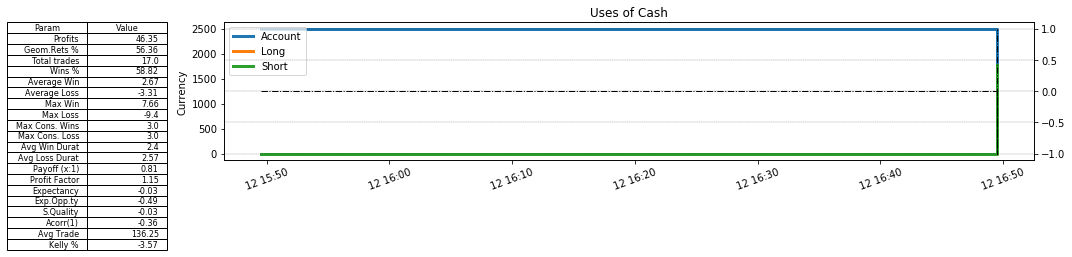

In [5]:
r,s=b.printSnapshot('simple')


In [8]:
r[r['AAPL_sh']>0]

In [9]:
b.trades